In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [3]:
dfm = pd.read_csv('Xdata12_CornellMMWW.csv')
dfw = pd.read_csv('RosterLinkedInLabel_CornellMW.csv')

In [4]:
dfm.set_index('FirstLast', drop=False, inplace=True)
dfw.set_index('FirstLast', drop=False, inplace=True)

In [5]:
#dfw = dfw.append(dfm)

In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, Abedin Sham to Winifred Johnson
Data columns (total 16 columns):
FirstLast         472 non-null object
Year              472 non-null int64
YearsPlayed       472 non-null int64
Gender            472 non-null int64
fuzz_ratio        472 non-null float64
fuzz_pratio       472 non-null float64
fuzz_tokensort    472 non-null float64
fuzz_tokenset     472 non-null float64
fuzz_wratio       472 non-null float64
tennis_yn         472 non-null float64
School_yn         472 non-null float64
SameName_yn       472 non-null float64
SameTennis_yn     472 non-null float64
Decade            472 non-null int64
MatchLinkedIn     472 non-null float64
prediction        472 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 62.7+ KB


In [7]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, Abedin Sham to Winifred Johnson
Data columns (total 34 columns):
FirstLast         613 non-null object
Criteria          613 non-null object
Year              613 non-null int64
YearsPlayed       613 non-null int64
RosterLink        137 non-null object
Hometown          395 non-null object
HS                392 non-null object
ClassYear         395 non-null object
College           613 non-null object
First             613 non-null object
Gender            613 non-null int64
Last              613 non-null object
MidInit           108 non-null object
MidName           9 non-null object
Name              395 non-null object
RosterYear        395 non-null object
LName             472 non-null object
SearchResult      472 non-null object
Headline          472 non-null object
Location          472 non-null object
Company           454 non-null object
School            472 non-null object
Activites         472 non-null object
fuzz_rat

In [8]:
dfw['prediction'] = dfm['prediction']

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
#dfw['LinkedInMatch'] = dfw['MatchLinkedIn']
#dfm['LinkedInMatch'] = dfm['MatchLinkedIn']

In [11]:
dfw['MatchLinkedIn'].value_counts()


1.0    272
0.0    200
Name: MatchLinkedIn, dtype: int64

In [12]:
dfw['prediction'].value_counts()

1.0    275
0.0    197
Name: prediction, dtype: int64

In [13]:
dfw['PredictMatch'] = dfw['prediction'] == dfw['MatchLinkedIn']
dfw.PredictMatch = dfw.PredictMatch.astype(int)
dfw['PredictMatch'][dfw['prediction'].isna()] = np.nan


C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
dfw['PredictMatch'].value_counts()

1.0    445
0.0     27
Name: PredictMatch, dtype: int64

In [15]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, Abedin Sham to Winifred Johnson
Data columns (total 36 columns):
FirstLast         613 non-null object
Criteria          613 non-null object
Year              613 non-null int64
YearsPlayed       613 non-null int64
RosterLink        137 non-null object
Hometown          395 non-null object
HS                392 non-null object
ClassYear         395 non-null object
College           613 non-null object
First             613 non-null object
Gender            613 non-null int64
Last              613 non-null object
MidInit           108 non-null object
MidName           9 non-null object
Name              395 non-null object
RosterYear        395 non-null object
LName             472 non-null object
SearchResult      472 non-null object
Headline          472 non-null object
Location          472 non-null object
Company           454 non-null object
School            472 non-null object
Activites         472 non-null object
fuzz_rat

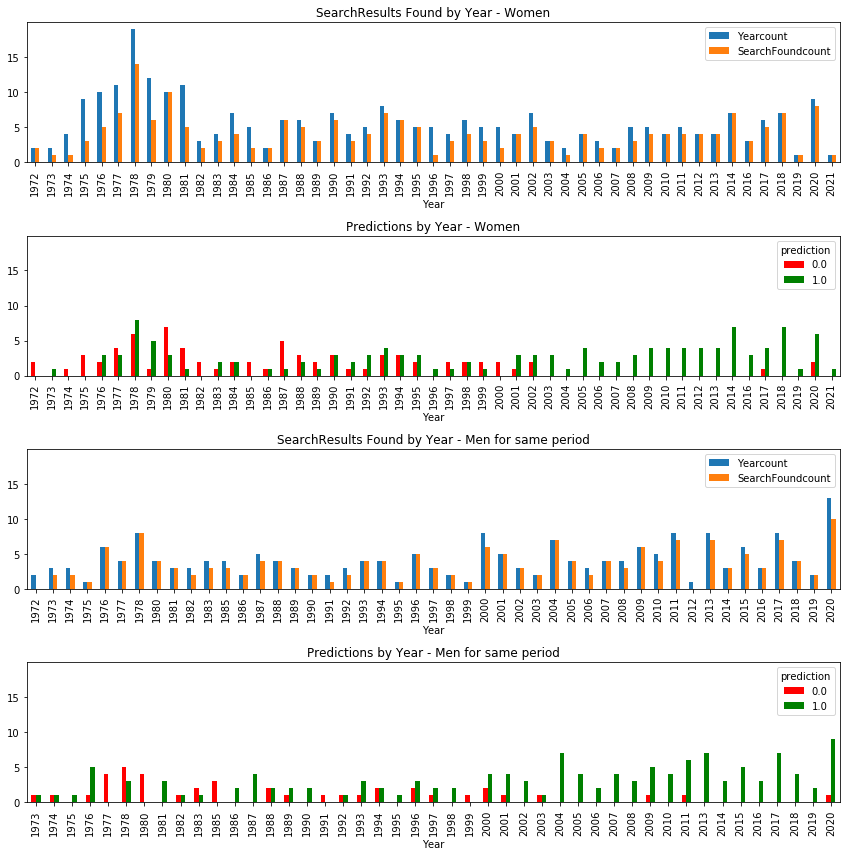

In [36]:
fig, (ax1, ax2, ax3, ax4)\
= plt.subplots(nrows=4, ncols=1, figsize=(12,12), sharey=True)
fig.tight_layout()

ax1.set_title("SearchResults Found by Year - Women")
dfwf = dfw[(dfw['Gender'] == 0)]
yeargroup = dfwf.groupby(['Year']).agg(Year=pd.NamedAgg(column='Year', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Year', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroup.plot.bar('Year', ax=ax1)

ax2.set_title("Predictions by Year - Women")
tabf = pd.crosstab(dfwf['Year'] , dfwf['prediction'])
tabf.plot(kind='bar', ax=ax2, colors='rg')

ax3.set_title("SearchResults Found by Year - Men for same period")
dfwm72 = dfw[(dfw['Gender'] == 1) & (dfw['Year'] >= 1972)]
yeargroupm72 = dfwm72.groupby(['Year']).agg(Year=pd.NamedAgg(column='Year', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Year', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroupm72.plot.bar('Year', ax=ax3)

ax4.set_title("Predictions by Year - Men for same period")
tabm72 = pd.crosstab(dfwm72['Year'] , dfwm72['prediction'])
tabm72.plot(kind='bar', ax=ax4, colors='rg')
fig.tight_layout()

plt.show()

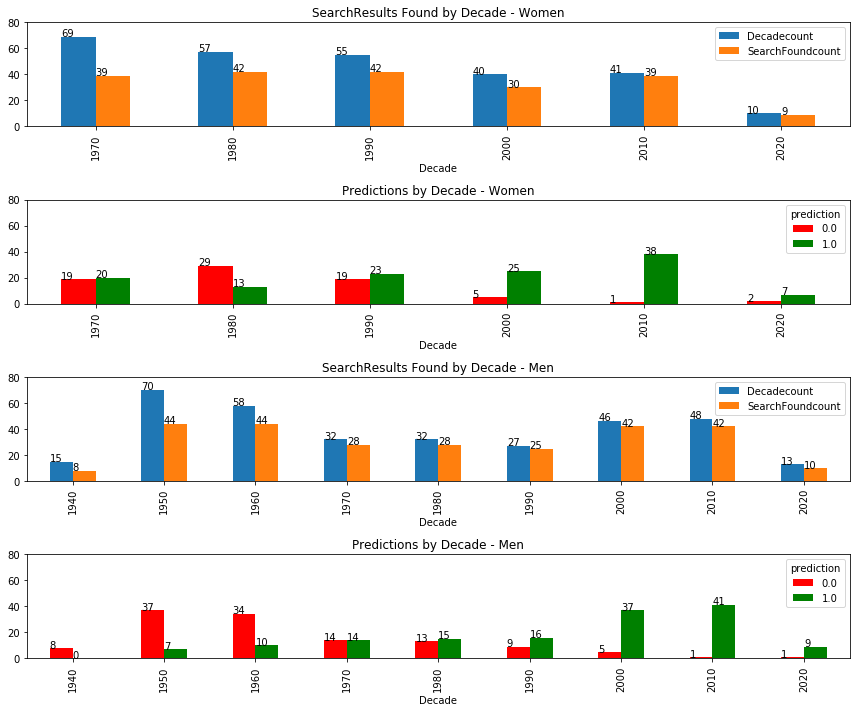

In [35]:
fig, (ax1, ax2, ax3, ax4)\
= plt.subplots(nrows=4, ncols=1, figsize=(12,10), sharey=True)
fig.tight_layout()

ax1.set_title("SearchResults Found by Decade - Women")
dfwf = dfw[(dfw['Gender'] == 0)]
yeargroup = dfwf.groupby(['Decade']).agg(Decade=pd.NamedAgg(column='Decade', aggfunc='first'),
                                      Decadecount = pd.NamedAgg(column='Decade', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroup.plot.bar('Decade', ax=ax1)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax1.set_ylim(0,80)


ax2.set_title("Predictions by Decade - Women")
tabf = pd.crosstab(dfwf['Decade'] , dfwf['prediction'])
tabf.plot(kind='bar', ax=ax2, colors='rg')
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))


ax3.set_title("SearchResults Found by Decade - Men")
dfwm = dfw[(dfw['Gender'] == 1)]
yeargroupm = dfwm.groupby(['Decade']).agg(Decade=pd.NamedAgg(column='Decade', aggfunc='first'),
                                      Decadecount = pd.NamedAgg(column='Decade', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroupm.plot.bar('Decade', ax=ax3)
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

ax4.set_title("Predictions by Decade - Men")
tabm = pd.crosstab(dfwm['Decade'] , dfwm['prediction'])
tabm.plot(kind='bar', ax=ax4, colors='rg')
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

fig.tight_layout()

plt.show()

In [18]:
Total = len(dfw['SearchResult'])
LinkedInCount = len(dfw['SearchResult']) - dfw['SearchResult'].isnull().sum()
LinkedInPct = LinkedInCount/Total
dfw_match = dfw.loc[dfw['MatchLinkedIn'] == 1]
Match = len(dfw_match['SearchResult'])
MatchPct = Match/LinkedInCount
TotalPct = Match/Total

In [19]:
dfw_bool = dfw.notnull()

The number of LinkedIn profiles found is 472 out of 613 or 77.0%
The number of Matches for profiles found is 272 out of 472 or 57.63%
The overall ratio of Matching profiles is 272 out of 613 or 44.37%


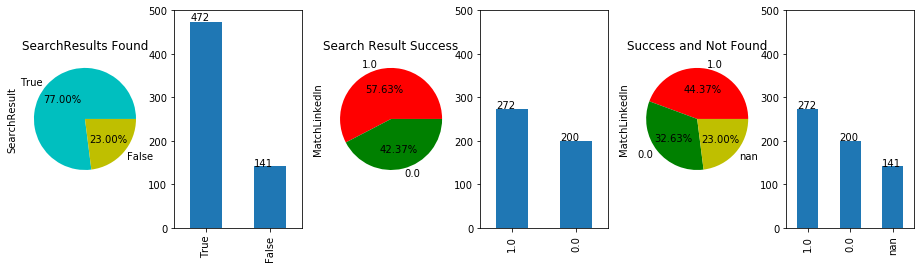

In [111]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_bool.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_bool.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,500)

ax[2].set_title("Search Result Success")
dfw.MatchLinkedIn.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw.MatchLinkedIn.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,500)

ax[4].set_title("Success and Not Found")
dfw.MatchLinkedIn.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw.MatchLinkedIn.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,500)

print('The number of LinkedIn profiles found is ' + str(LinkedInCount)+ ' out of '+ str(Total) + ' or ' +\
     str(round(LinkedInPct*100,2)) +"%")
print('The number of Matches for profiles found is ' + str(Match)+ ' out of '+ str(LinkedInCount) + ' or ' +\
     str(round(MatchPct*100,2)) +"%")
print('The overall ratio of Matching profiles is ' + str(Match)+ ' out of '+ str(Total) + ' or ' +\
     str(round(TotalPct*100,2)) +"%")
    
plt.show()


In [113]:
Total = len(dfw['SearchResult'])
LinkedInCount = len(dfw['SearchResult']) - dfw['SearchResult'].isnull().sum()
LinkedInPct = LinkedInCount/Total
dfw_predict = dfw.loc[dfw['prediction'] == 1]
PredictMatch = len(dfw_predict['SearchResult'])
PredictNoMatch = LinkedInCount - PredictMatch
PredictMatchPct = Match/LinkedInCount
PredictTotalPct = PredictMatch/Total

The number of LinkedIn profiles found is 472 out of 613 or 77.0%
The number of Predicted Matches for profiles found is 275 out of 472 or 57.63%
The number of Predicted Matching profiles is 275 out of 613 or 44.86%


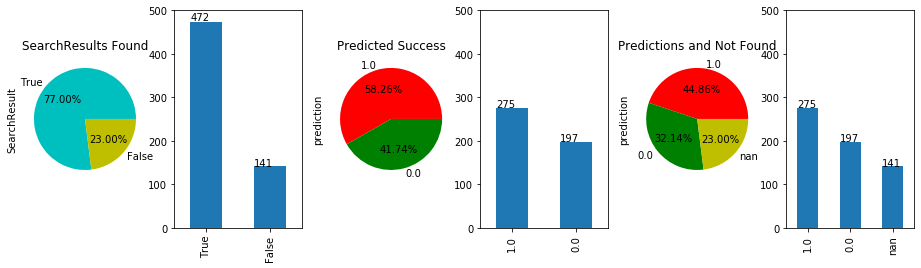

In [114]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_bool.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_bool.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,500)

ax[2].set_title("Predicted Success")
dfw.prediction.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw.prediction.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,500)

ax[4].set_title("Predictions and Not Found")
dfw.prediction.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw.prediction.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,500)

print('The number of LinkedIn profiles found is ' + str(LinkedInCount)+ ' out of '+ str(Total) + ' or ' +\
     str(round(LinkedInPct*100,2)) +"%")
print('The number of Predicted Matches for profiles found is ' + str(PredictMatch)+ ' out of '+ str(LinkedInCount) + ' or ' +\
     str(round(PredictMatchPct*100,2)) +"%")
print('The number of Predicted Matching profiles is ' + str(PredictMatch)+ ' out of '+ str(Total) + ' or ' +\
     str(round(PredictTotalPct*100,2)) +"%")
    
plt.show()


In [55]:
NumPredictions = len(dfw[dfw['PredictMatch'].notnull()])
PredictionRight = len(dfw[dfw['PredictMatch']==1])
PredictionRightPct = PredictionRight/NumPredictions
PredictionWrong = len(dfw[dfw['PredictMatch']==0])
PredictionRightMatch = len(dfw[(dfw['PredictMatch']==1) & (dfw['prediction']==1)])
PredictionRightMatchPct = PredictionRightMatch/PredictMatch 
PredictionRightNoMatch = len(dfw[(dfw['PredictMatch']==1) & (dfw['prediction']==0)])
PredictionRightNoMatchPct = PredictionRightNoMatch/PredictNoMatch 
PredictionWrongMatch = len(dfw[(dfw['PredictMatch']==0) & (dfw['prediction']==1)])
PredictionWrongMatchPct = PredictionWrongMatch/PredictMatch 
PredictionWrongNoMatch = len(dfw[(dfw['PredictMatch']==0) & (dfw['prediction']==0)])
PredictionWrongNoMatchPct = PredictionWrongNoMatch/PredictNoMatch 

The number of Right Predictions is 445 out of 472 or 94.28%
The number of Right GoodMatch Predictions is 260 out of 275 or 94.55%
The number of Right NoMatch Predictions is 185 out of 197 or 93.91%
The number of Wrong GoodMatch Predictions is 15 out of 275 or 5.45% These are FALSE POSITIVES, or Wrong Profile is predicted as Right, and you could contact the wrong person
The number of Wrong NoMatch Predictions is 12 out of 197 or 6.09% These are FALSE NEGATIVES, or Right Profile is predicted as Wrong, so you could miss out on contacting some people


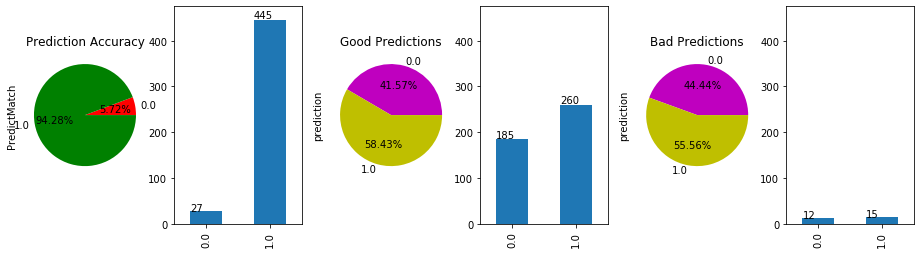

In [58]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("Prediction Accuracy")
dfw[dfw['PredictMatch'].notnull()].PredictMatch.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax[0], colors='rg')
dfw[dfw['PredictMatch'].notnull()].PredictMatch.value_counts().sort_index().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,475)

ax[2].set_title("Good Predictions")
dfw[dfw['PredictMatch']==1].prediction.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax[2], colors='my')
dfw[dfw['PredictMatch']==1].prediction.value_counts().sort_index().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,475)

ax[4].set_title("Bad Predictions")
dfw[dfw['PredictMatch']==0].prediction.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax[4], colors='my')
dfw[dfw['PredictMatch']==0].prediction.value_counts().sort_index().plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,475)
    
print('The number of Right Predictions is ' + str(PredictionRight)+ ' out of '+ str(NumPredictions) + ' or ' +\
     str(round(PredictionRightPct*100,2)) +"%")
print('The number of Right GoodMatch Predictions is ' + str(PredictionRightMatch)+ ' out of '+ str(PredictMatch) + ' or ' +\
     str(round(PredictionRightMatchPct*100,2)) +"%")
print('The number of Right NoMatch Predictions is ' + str(PredictionRightNoMatch)+ ' out of '+ str(PredictNoMatch) + ' or ' +\
     str(round(PredictionRightNoMatchPct*100,2)) +"%")
print('The number of Wrong GoodMatch Predictions is ' + str(PredictionWrongMatch)+ ' out of '+ str(PredictMatch) + ' or ' +\
     str(round(PredictionWrongMatchPct*100,2)) +"%" + \
      ' These are FALSE POSITIVES, or Wrong Profile is predicted as Right, and you could contact the wrong person')
print('The number of Wrong NoMatch Predictions is ' + str(PredictionWrongNoMatch)+ ' out of '+ str(PredictNoMatch) + ' or ' +\
     str(round(PredictionWrongNoMatchPct*100,2)) +"%" + \
      ' These are FALSE NEGATIVES, or Right Profile is predicted as Wrong, so you could miss out on contacting some people')
    
plt.show()


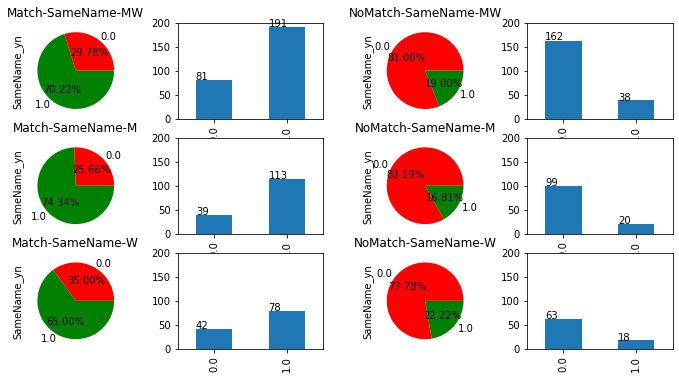

In [37]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=3, ncols=4, figsize=(12,6))

ax1.set_title("Match-SameName-MW")
dfw[(dfw['MatchLinkedIn'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.002))
    ax2.set_ylim(0,200)

ax3.set_title("NoMatch-SameName-MW")
dfw[(dfw['MatchLinkedIn'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,200)

ax5.set_title("Match-SameName-M")
dfw[(dfw['MatchLinkedIn'] == 1) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 1) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)

ax7.set_title("NoMatch-SameName-M")
dfw[(dfw['MatchLinkedIn'] == 0) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 0) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)

ax9.set_title("Match-SameName-W")
dfw[(dfw['MatchLinkedIn'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)

ax11.set_title("NoMatch-SameName-W")
dfw[(dfw['MatchLinkedIn'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rg')
dfw[(dfw['MatchLinkedIn'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)
        
plt.show()


In [22]:
dfw72 = dfw[dfw['Year'] >= 1972]

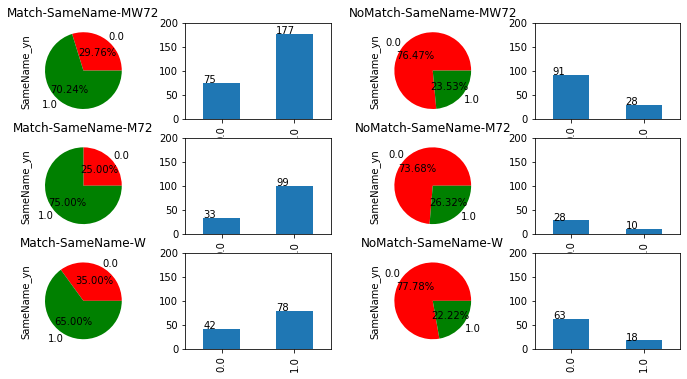

In [39]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=3, ncols=4, figsize=(12,6))

ax1.set_title("Match-SameName-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.002))
    ax2.set_ylim(0,200)

ax3.set_title("NoMatch-SameName-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,200)

ax5.set_title("Match-SameName-M72")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)

ax7.set_title("NoMatch-SameName-M72")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)

ax9.set_title("Match-SameName-W")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)

ax11.set_title("NoMatch-SameName-W")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)
        
plt.show()


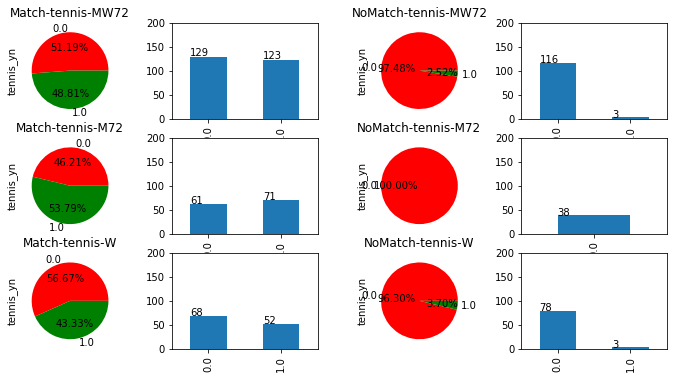

In [40]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=3, ncols=4, figsize=(12,6))

ax1.set_title("Match-tennis-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,200)

ax3.set_title("NoMatch-tennis-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.002))
    ax4.set_ylim(0,200)

ax5.set_title("Match-tennis-M72")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)

ax7.set_title("NoMatch-tennis-M72")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)

ax9.set_title("Match-tennis-W")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)

ax11.set_title("NoMatch-tennis-W")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)
        
plt.show()


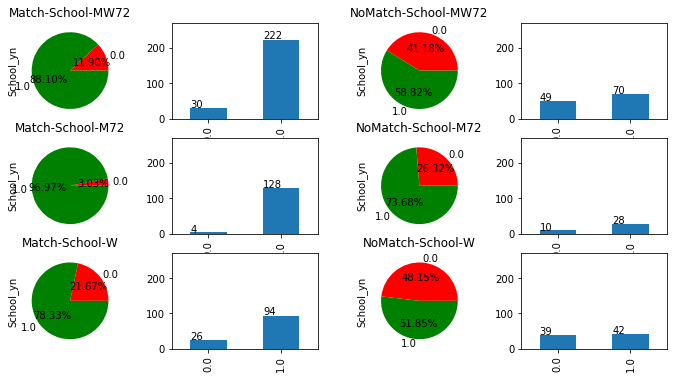

In [42]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=3, ncols=4, figsize=(12,6))

ax1.set_title("Match-School-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,271)

ax3.set_title("NoMatch-School-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,271)

ax5.set_title("Match-School-M72")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,271)

ax7.set_title("NoMatch-School-M72")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,271)

ax9.set_title("Match-School-W")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,271)

ax11.set_title("NoMatch-School-W")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,271)
        
plt.show()


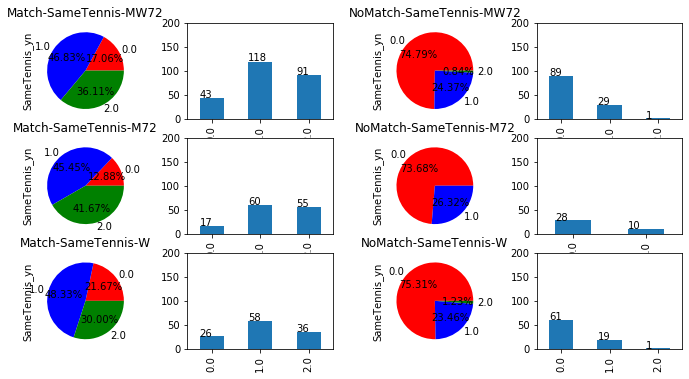

In [44]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=3, ncols=4, figsize=(12,6))

ax1.set_title("Match-SameTennis-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,200)

ax3.set_title("NoMatch-SameTennis-MW72")
dfw72[(dfw72['MatchLinkedIn'] == 0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,200)

ax5.set_title("Match-SameTennis-M72")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)

ax7.set_title("NoMatch-SameTennis-M72")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)

ax9.set_title("Match-SameTennis-W")
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 1) & (dfw72['Gender']==0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)

ax11.set_title("NoMatch-SameTennis-W")
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw72[(dfw72['MatchLinkedIn'] == 0) & (dfw72['Gender']==0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)
        
plt.show()


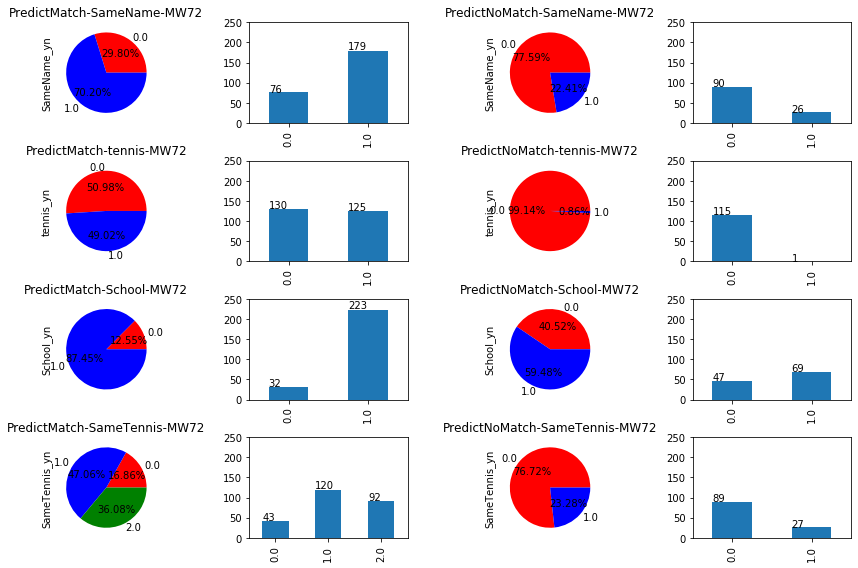

In [46]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-MW72")
dfw72[(dfw72['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw72[(dfw72['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,250)

    ax3.set_title("PredictNoMatch-SameName-MW72")
dfw72[(dfw72['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw72[(dfw72['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,250)


ax5.set_title("PredictMatch-tennis-MW72")
dfw72[(dfw72['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw72[(dfw72['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,250)


ax7.set_title("PredictNoMatch-tennis-MW72")
dfw72[(dfw72['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw72[(dfw72['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,250)


ax9.set_title("PredictMatch-School-MW72")
dfw72[(dfw72['prediction'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw72[(dfw72['prediction'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,250)


ax11.set_title("PredictNoMatch-School-MW72")
dfw72[(dfw72['prediction'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw72[(dfw72['prediction'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,250)

        
ax13.set_title("PredictMatch-SameTennis-MW72")
dfw72[(dfw72['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw72[(dfw72['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,250)


ax15.set_title("PredictNoMatch-SameTennis-MW72")
dfw72[(dfw72['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw72[(dfw72['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,250)

fig.tight_layout()    
plt.show()


In [75]:
cols_to_order = ['MatchLinkedIn', 'Gender', 'FirstLast', 'LName', 'SearchResult', 'Year', 'YearsPlayed', 'Headline', 'Location', 'Company', 'RosterLink', 'Hometown', 'HS']
new_columns = cols_to_order + (dfw.columns.drop(cols_to_order).tolist())
dfw= dfw[new_columns]

In [76]:
#dfw.to_csv('CornellData.csv')